In [1]:
import arviz as az
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from scipy.special import erf

az.rcParams["plot.max_subplots"] = 80

First, load the output of our inference as an arviz InferenceData object:

In [2]:
#data = az.from_netcdf("ar_chi_cost_TransformedUniform.cdf")
data = az.from_netcdf("/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/ar_chi_cost_1000_1500_noReweighting.cdf")
az.summary(data,["logR20",
                 "alpha",
                 "mMin",
                 "log_dmMin",
                 "mu_m1",
                 "sig_m1",
                 "log_f_peak",
                 "mMax",
                 "log_dmMax",
                 "bq",
                 "kappa",
                 "ar_chi_std",
                 "ar_chi_tau",
                 "ar_cost_std",
                 "ar_cost_tau",
                 "nEff_inj_per_event",
                 "min_log_neff"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
logR20,-1.598,0.936,-3.375,0.190,0.017,0.013,3149.0,2593.0,1.0
alpha,-3.832,0.313,-4.366,-3.196,0.006,0.005,2668.0,1814.0,1.0
mMin,9.070,0.925,7.259,10.800,0.017,0.012,3390.0,2409.0,1.0
log_dmMin,-0.382,0.368,-0.996,0.214,0.006,0.005,3119.0,2731.0,1.0
mu_m1,33.219,2.537,28.517,37.508,0.081,0.057,2220.0,877.0,1.0
sig_m1,5.089,2.109,3.000,9.266,0.063,0.051,2124.0,970.0,1.0
log_f_peak,-2.691,0.226,-3.000,-2.288,0.004,0.003,3400.0,2663.0,1.0
mMax,78.705,12.677,57.464,99.954,0.166,0.118,5144.0,3071.0,1.0
log_dmMax,1.049,0.281,0.579,1.493,0.004,0.002,5936.0,2763.0,1.0
bq,2.196,1.068,0.357,4.206,0.014,0.012,7386.0,3217.0,1.0


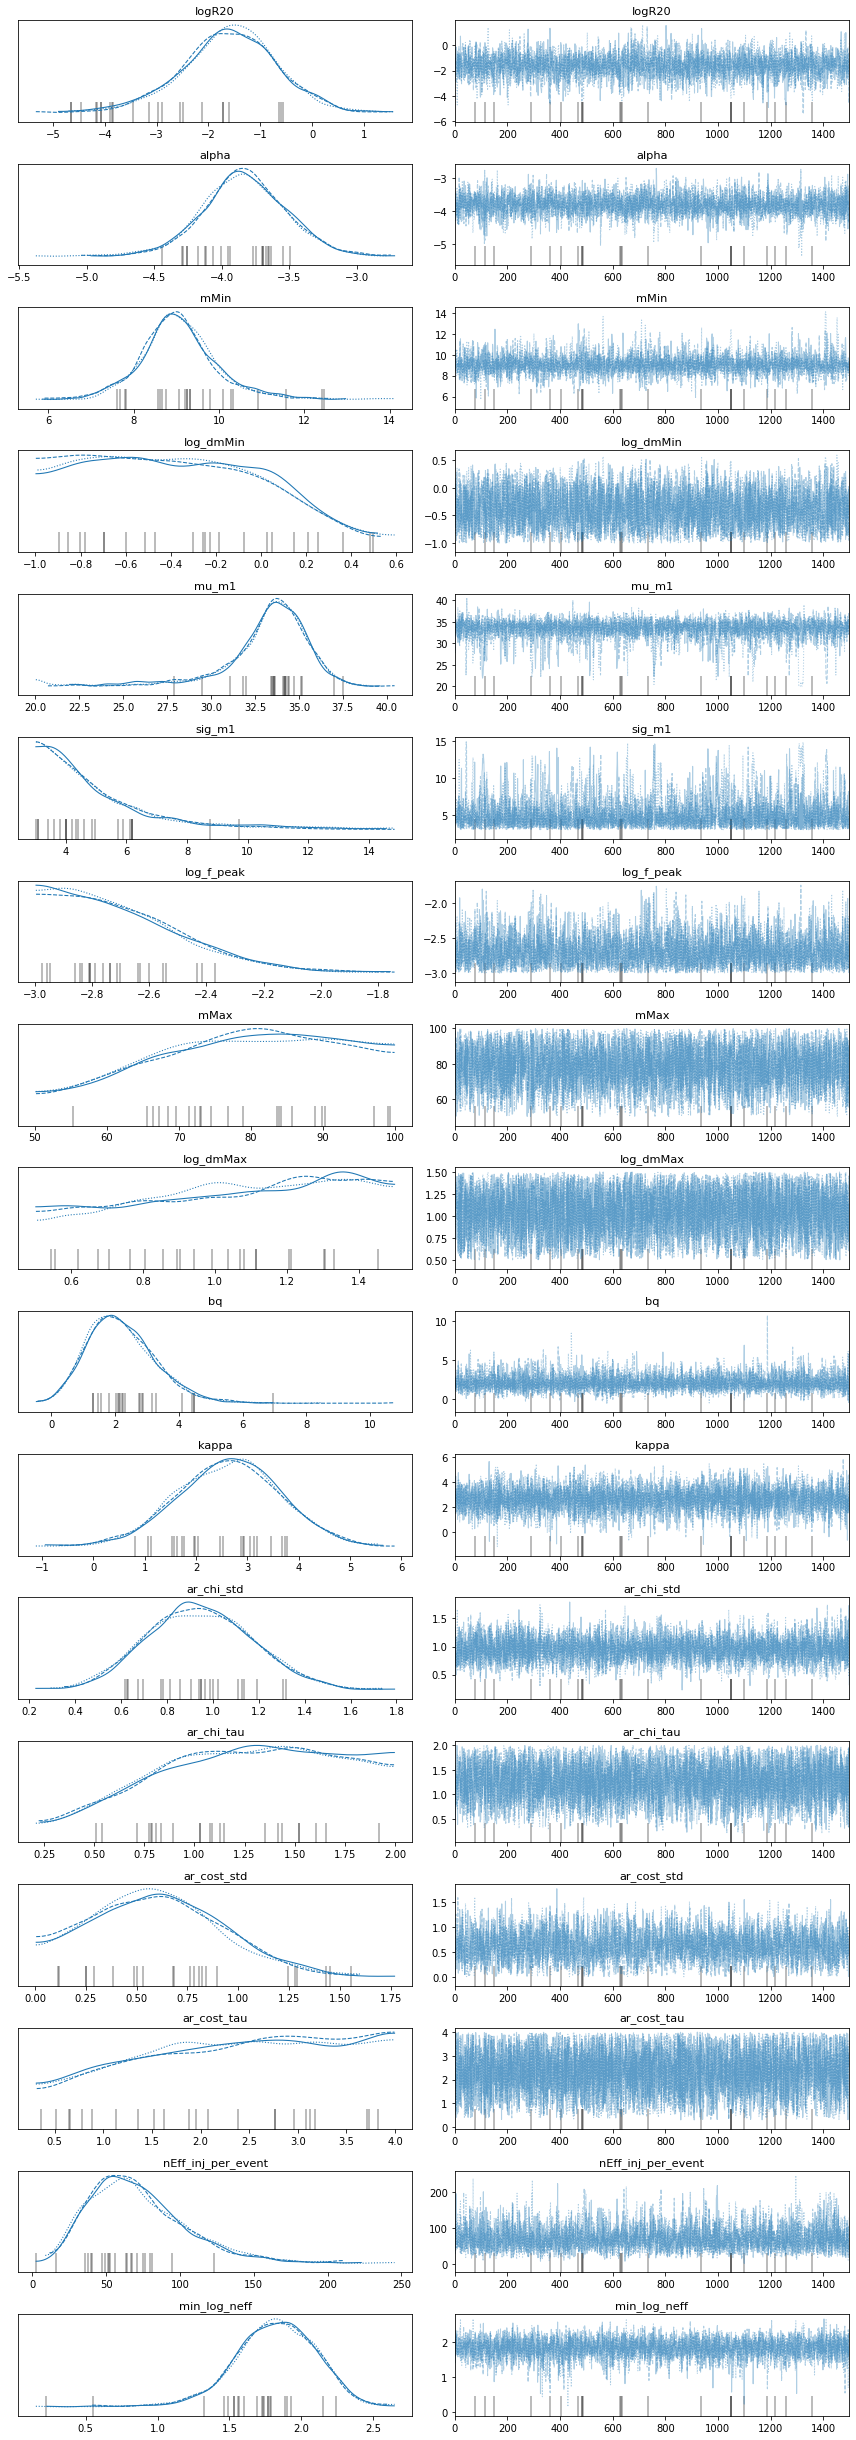

In [3]:
az.plot_trace(data,
              ["logR20",
               "alpha",
               "mMin",
               "log_dmMin",
               "mu_m1",
               "sig_m1",
               "log_f_peak",
               "mMax",
               "log_dmMax",
               "bq",
               "kappa",
               "ar_chi_std",
               "ar_chi_tau",
               "ar_cost_std",
               "ar_cost_tau",
               "nEff_inj_per_event","min_log_neff"], compact=True)
plt.tight_layout()
plt.show()

In [3]:
#ar_data = np.load('ar_chi_cost_data.npy',allow_pickle=True)[()]
ar_data = np.load('/mnt/ceph/users/tcallister/autoregressive-bbh-inference-data/ar_chi_cost_data_1000_1500_noReweighting.npy',allow_pickle=True)[()]
chi_values = np.exp(ar_data['chi_allSamples'])
cost_values = ar_data['cost_allSamples']

In [ ]:
samps = data.posterior.stack(draws=("chain", "draw"))

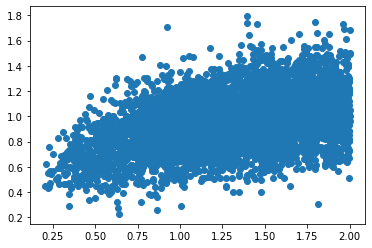

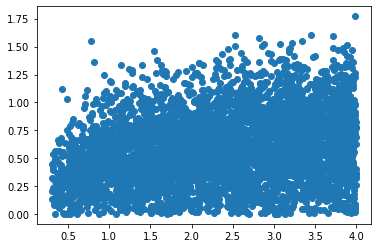

In [ ]:
plt.scatter(data.posterior.ar_chi_tau.values,data.posterior.ar_chi_std.values)
plt.show()

plt.scatter(data.posterior.ar_cost_tau.values,data.posterior.ar_cost_std.values)
plt.show()

In [20]:
reduced_f_chis = np.concatenate([data.posterior.f_chis[i][:,::50].values for i in range(3)])
reduced_f_costs = np.concatenate([data.posterior.f_cost[i][:,::50].values for i in range(3)])

In [22]:
reduced_f_chis.shape

(4500, 9871)

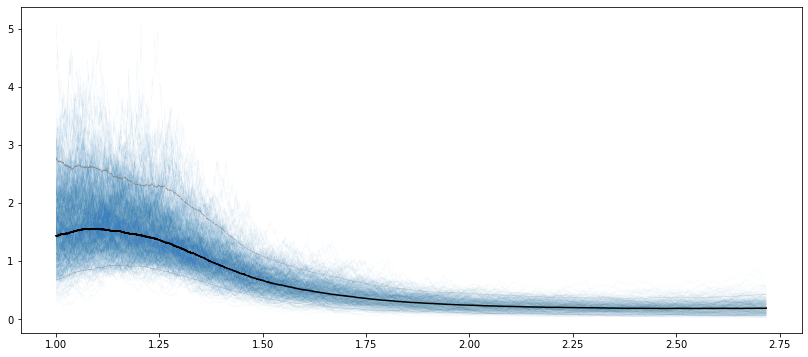

In [26]:
reduced_chis = chi_values[::50]

p_chis = np.zeros((reduced_chis.size,reduced_f_chis.shape[0]))
for i in range(reduced_f_chis.shape[0]):
    p_chis[:,i] = reduced_f_chis[i,:]
    p_chis[:,i] /= np.trapz(p_chis[:,i],reduced_chis)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(p_chis.shape[1]),600)
for i in random_inds:
    ax.plot(reduced_chis,p_chis[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_chis,np.median(p_chis,axis=1),color='black')
ax.plot(reduced_chis,np.quantile(p_chis,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_chis,np.quantile(p_chis,0.95,axis=1),color='grey',lw=0.15)

plt.show()

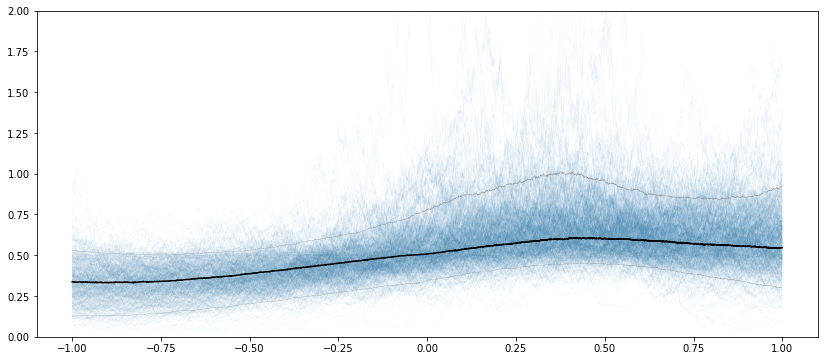

In [27]:
reduced_costs = cost_values[::50]

p_costs = np.zeros((reduced_costs.size,reduced_f_costs.shape[0]))
for i in range(reduced_f_costs.shape[0]):
    p_costs[:,i] = reduced_f_costs[i,:]
    p_costs[:,i] /= np.trapz(p_costs[:,i],reduced_costs)

fig,ax = plt.subplots(figsize=(14,6))
random_inds = np.random.choice(np.arange(p_costs.shape[1]),600)
for i in random_inds:
    ax.plot(reduced_costs,p_costs[:,i],color='#3182bd',alpha=0.1,lw=0.1,zorder=0)

ax.plot(reduced_costs,np.median(p_costs,axis=1),color='black')
ax.plot(reduced_costs,np.quantile(p_costs,0.05,axis=1),color='grey',lw=0.15)
ax.plot(reduced_costs,np.quantile(p_costs,0.95,axis=1),color='grey',lw=0.15)

ax.set_ylim(0,2)

plt.show()

In [8]:
likelihood_data = data.log_likelihood.stack(draws=("chain", "draw"))

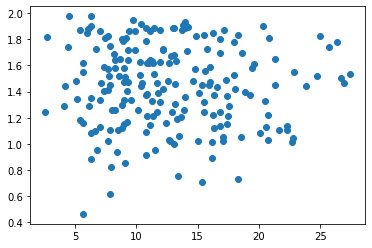

In [10]:
test = (np.max(np.log(samps['f_chis']),axis=0)-np.min(np.log(samps['f_chis']),axis=0))**2
#plt.scatter(test,likelihood_data['chi_elastic'])
plt.scatter(test,samps['ar_chi_tau'])